Chapter 1

単回帰

In [33]:
# https://qiita.com/A03ki/items/007be353411d19952ef7
include("./Functions.jl")
using .GPLM
using Random
using Plots
using LinearAlgebra

gr()

Plots.GRBackend()

In [26]:
f(x)=2x[1]+3
x,y=GPLM.ToyData(f,1,messiness=0.1)

([0.48497739109231053; 0.17738666950023907; … ; 0.33883955139938804; 0.5689999415722182], Any[3.872037886102784, 3.140251784366644, 4.77684867855876, 3.550917075552443, 4.194878741801553, 4.585278620980444, 3.503610555115372, 3.236971675838586, 3.422540282731597, 4.255951655509456  …  3.3860010597522407, 4.351736178776619, 3.214139112641159, 3.6464091580938276, 4.775128100055677, 4.246221620337922, 4.423516167607299, 4.682118300927873, 3.6496241757981376, 3.9989229615262327])

Array{Float64,2}


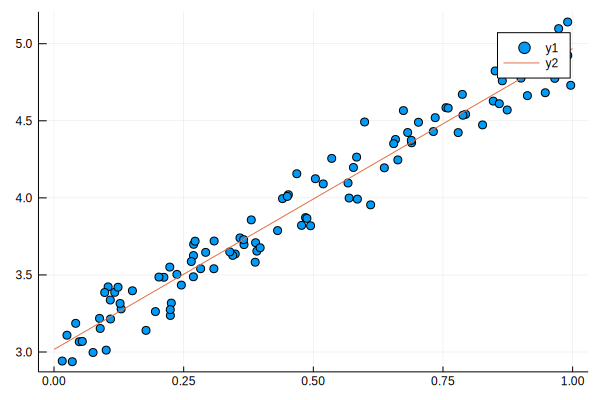

In [27]:
X=[
    length(x) sum(x)
    sum(x) sum(abs2,x)
]
Y=[
    sum(y)
    sum([x[i]*y[i] for i in 1:length(x)])
]
println(typeof(X))
s=inv(X)*Y
fa(x)=s[2] .*x .+s[1]
xa=0:0.01:1
ya=fa(xa)
plot(x,y,seriestype=:scatter)
plot!(xa,ya)

重回帰

In [7]:
# トイデータ

f(x)=10+3x[1]+5x[2]
X,y=GPLM.ToyData(f,2)

([0.8152232221562374 0.25415453176399483; 0.020599430372316263 0.04208477797952748; … ; 0.21333198339403459 0.5072375648859373; 0.06632077324330732 0.6438464240209034], Any[13.789467290262394, 10.378271352061324, 10.660886867965937, 16.52085583423645, 12.89612751899483, 14.192686233905249, 13.975561360712673, 16.27487634062094, 15.579115551517896, 15.450261515687663  …  12.919934065562915, 11.263804390864523, 10.836705080188947, 13.801780358982539, 16.59374839880419, 11.93732747994329, 15.033536999422912, 10.336234115149125, 13.220884991962274, 13.560266663960979])

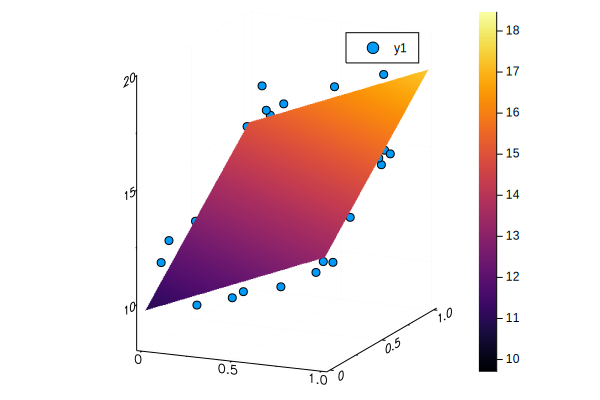

In [468]:
w=inv(X'*X)*X'*y
fa(x1,x2)=w[1].+w[2].*x1.+w[3].*x2
xa1=0:0.01:1
xa2=0:0.01:1
ya = [fa(i,j) for i in xa1, j in xa2]'
plot(x1,x2,y,seriestype=:scatter)
plot!(xa1,xa2,ya, st=:surface)

多項式回帰

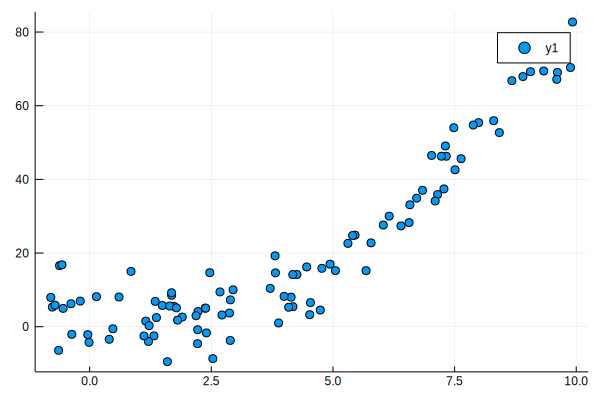

In [56]:
f(x)=1-2x[1]+x[1]^2
X,y=GPLM.ToyData(f,1,min=-1,max=10,messiness=5)
plot(X,y,seriestype=:scatter)

In [57]:
ϕ(x)=[1,x[1],x[1]^2]
Φ=[]
for i in 1:size(X,1)
    push!(Φ,ϕ(X[i,:])')
end
Φ=vcat(Φ...)

100×3 Array{Float64,2}:
 1.0   0.849429   0.721529
 1.0   9.88222   97.6582  
 1.0   1.37224    1.88303 
 1.0   8.41926   70.884   
 1.0   9.05895   82.0645  
 1.0   9.61301   92.41    
 1.0   6.03444   36.4144  
 1.0   6.58226   43.3261  
 1.0   2.88944    8.34887 
 1.0   3.88272   15.0755  
 1.0   7.28128   53.017   
 1.0  -0.618768   0.382874
 1.0   2.37526    5.64188 
 ⋮                        
 1.0   8.3037    68.9514  
 1.0   2.8925     8.36654 
 1.0   5.40393   29.2025  
 1.0   5.68081   32.2716  
 1.0   4.52297   20.4573  
 1.0   2.94779    8.68944 
 1.0   1.68343    2.83394 
 1.0   5.05096   25.5122  
 1.0   4.46037   19.8949  
 1.0   4.53766   20.5904  
 1.0   7.10042   50.416   
 1.0   3.99657   15.9725  

In [58]:
w=inv(Φ'*Φ)*Φ'*y
fa(x)=w'*ϕ(x)

fa (generic function with 1 method)

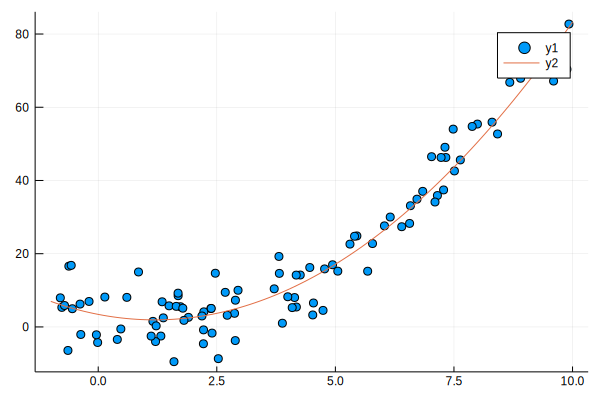

In [59]:
x=-1:0.1:10
ya=[fa(e) for e in x]
plot!(x,ya)

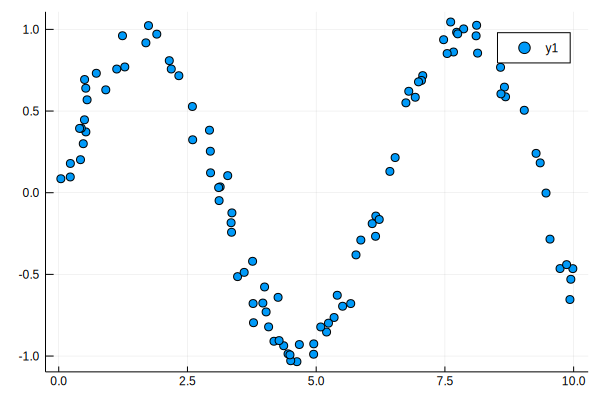

In [88]:
f(x)=sin(x[1])
X,y=GPLM.ToyData(f,1,min=0,max=10,messiness=0.1)
plot(X,y,seriestype=:scatter)

In [89]:
order=10
ϕ(x)=[x[1]^n for n in 0:order]

ϕ (generic function with 1 method)

In [90]:
Φ=[]
for i in 1:size(X,1)
    push!(Φ,ϕ(X[i,:])')
end
Φ=vcat(Φ...)

100×11 Array{Float64,2}:
 1.0  8.67751   75.2993    653.41      …      2.7897e8        2.42077e9  
 1.0  2.94854    8.69388    25.6342       16844.6         49667.1        
 1.0  6.15852   37.9274    233.577            1.27435e7       7.84813e7  
 1.0  8.65622   74.9302    648.613            2.72871e8       2.36203e9  
 1.0  0.499832   0.249832    0.124874         0.00194722      0.000973283
 1.0  9.94541   98.9112    983.712     …      9.51927e8       9.46731e9  
 1.0  3.13488    9.82748    30.808        29240.9         91666.7        
 1.0  8.58041   73.6234    631.719            2.52099e8       2.16311e9  
 1.0  6.08787   37.0621    225.629            1.14865e7       6.9928e7   
 1.0  6.74249   45.4612    306.521            2.87994e7       1.94179e8  
 1.0  3.96425   15.7152     62.2991    …      2.41794e5       9.58531e5  
 1.0  8.58834   73.7596    633.473            2.54205e8       2.1832e9   
 1.0  7.66642   58.774     450.586            9.14813e7       7.01334e8  
 ⋮           

In [91]:
w=inv(Φ'*Φ)*Φ'*y

11-element Array{Any,1}:
 -0.002459248869213348 
  0.8427560101855092   
  0.37140979983386524  
 -0.6922358175121606   
  0.39670211931305266  
 -0.16013521962558963  
  0.04297757320699018  
 -0.00699240112751189  
  0.0006588021277054073
 -3.3159893520526346e-5
  6.918703143394038e-7 

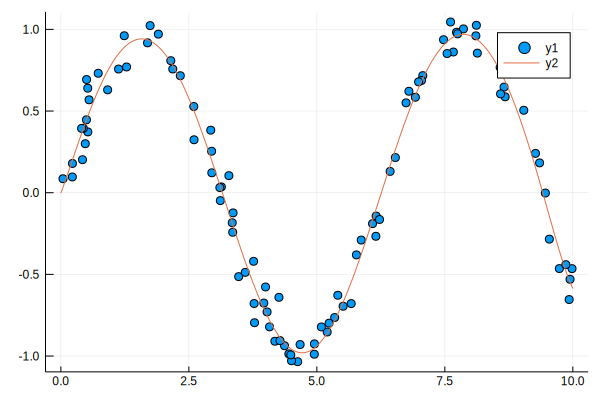

In [92]:
fa(x)=w'*ϕ(x)
x=0:0.01:10
ya=[fa(e) for e in x]
plot!(x,ya)

リッジ回帰

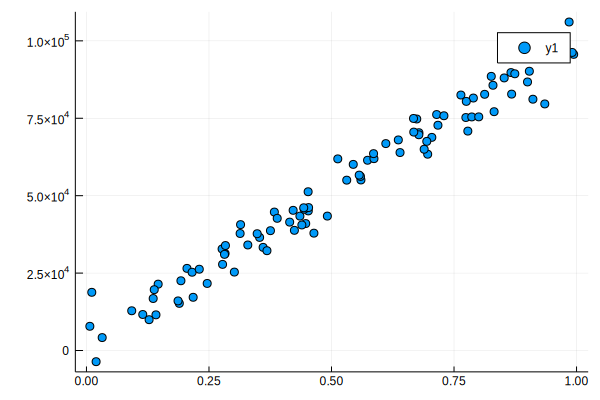

In [115]:
f(x)=0.001+100000x[1]
X,y=GPLM.ToyData(f,1;min=0,max=1,messiness=5000)
plot(X,y,seriestype=:scatter)

In [116]:
X=hcat([1 for i in 1:size(X,1)],X)
a=0.1
w=inv(X'*X+a*I)*X'*y

2-element Array{Any,1}:
  3366.939566020689
 95844.00506370349 

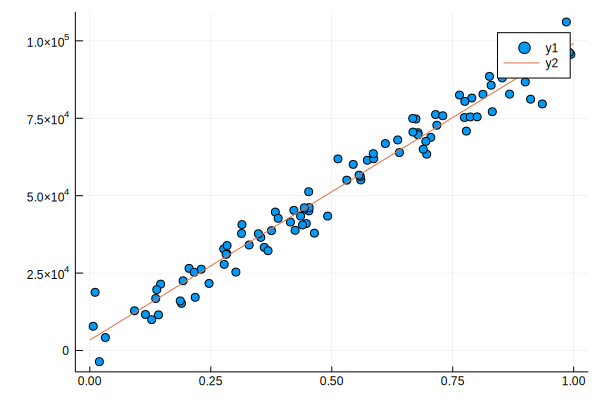

In [117]:
fa(x)=w'*[1;x[1]]
x=0:0.01:1
ya=[fa(e) for e in x]
plot!(x,ya)